In [1]:
import sys
# Add the scripts and src directories to the Python path
src_dir = r'E:\DS+ML\AIM3\Week4\Week4.AIM3\src'
file_path = r'E:\DS+ML\AIM3\Week4\Data\\'
if src_dir not in sys.path:
    sys.path.append(src_dir)

In [3]:
from data_preprocessing import load_data,detect_missing_values,detect_outliers,outlier_detection,preprocess_data
from Eda import (
    plot_promotion_distribution,
    analyze_sales_holidays,
    plot_monthly_sales_trend,
    analyze_sales_on_key_dates,
    plot_sales_vs_customers,
    plot_promo_effectiveness,
    plot_customer_trends_by_day,
    plot_weekend_vs_weekday_sales,
    plot_sales_vs_competitor_distance,
    plot_city_center_sales,
    plot_sales_trend_before_after_competitor_opening,
    compare_promo_effect,
    compare_assortment_sales
)



In [4]:

train = load_data(file_path + 'train.csv')
store = load_data(file_path + 'store.csv')  
test  =  load_data(file_path + 'test.csv')
# Display the first few rows of each dataset
print("\nTrain Data:")
train.head()


Train Data:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
print("\nStore Data:")
store.head()


Store Data:


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


🕵️‍♀️ Missing Values:
Empty DataFrame
Columns: [Missing Values, Percentage Missing]
Index: []

🕵️‍♂️ Outliers:
               Total Outliers  Lower Bound  Upper Bound
Store                       0       -557.0       1675.0
DayOfWeek                   0         -4.0         12.0
Sales                   26694      -2466.5      14049.5
Customers               38095       -243.0       1485.0
Open                   172817          1.0          1.0
Promo                       0         -1.5          2.5
SchoolHoliday          181721          0.0          0.0


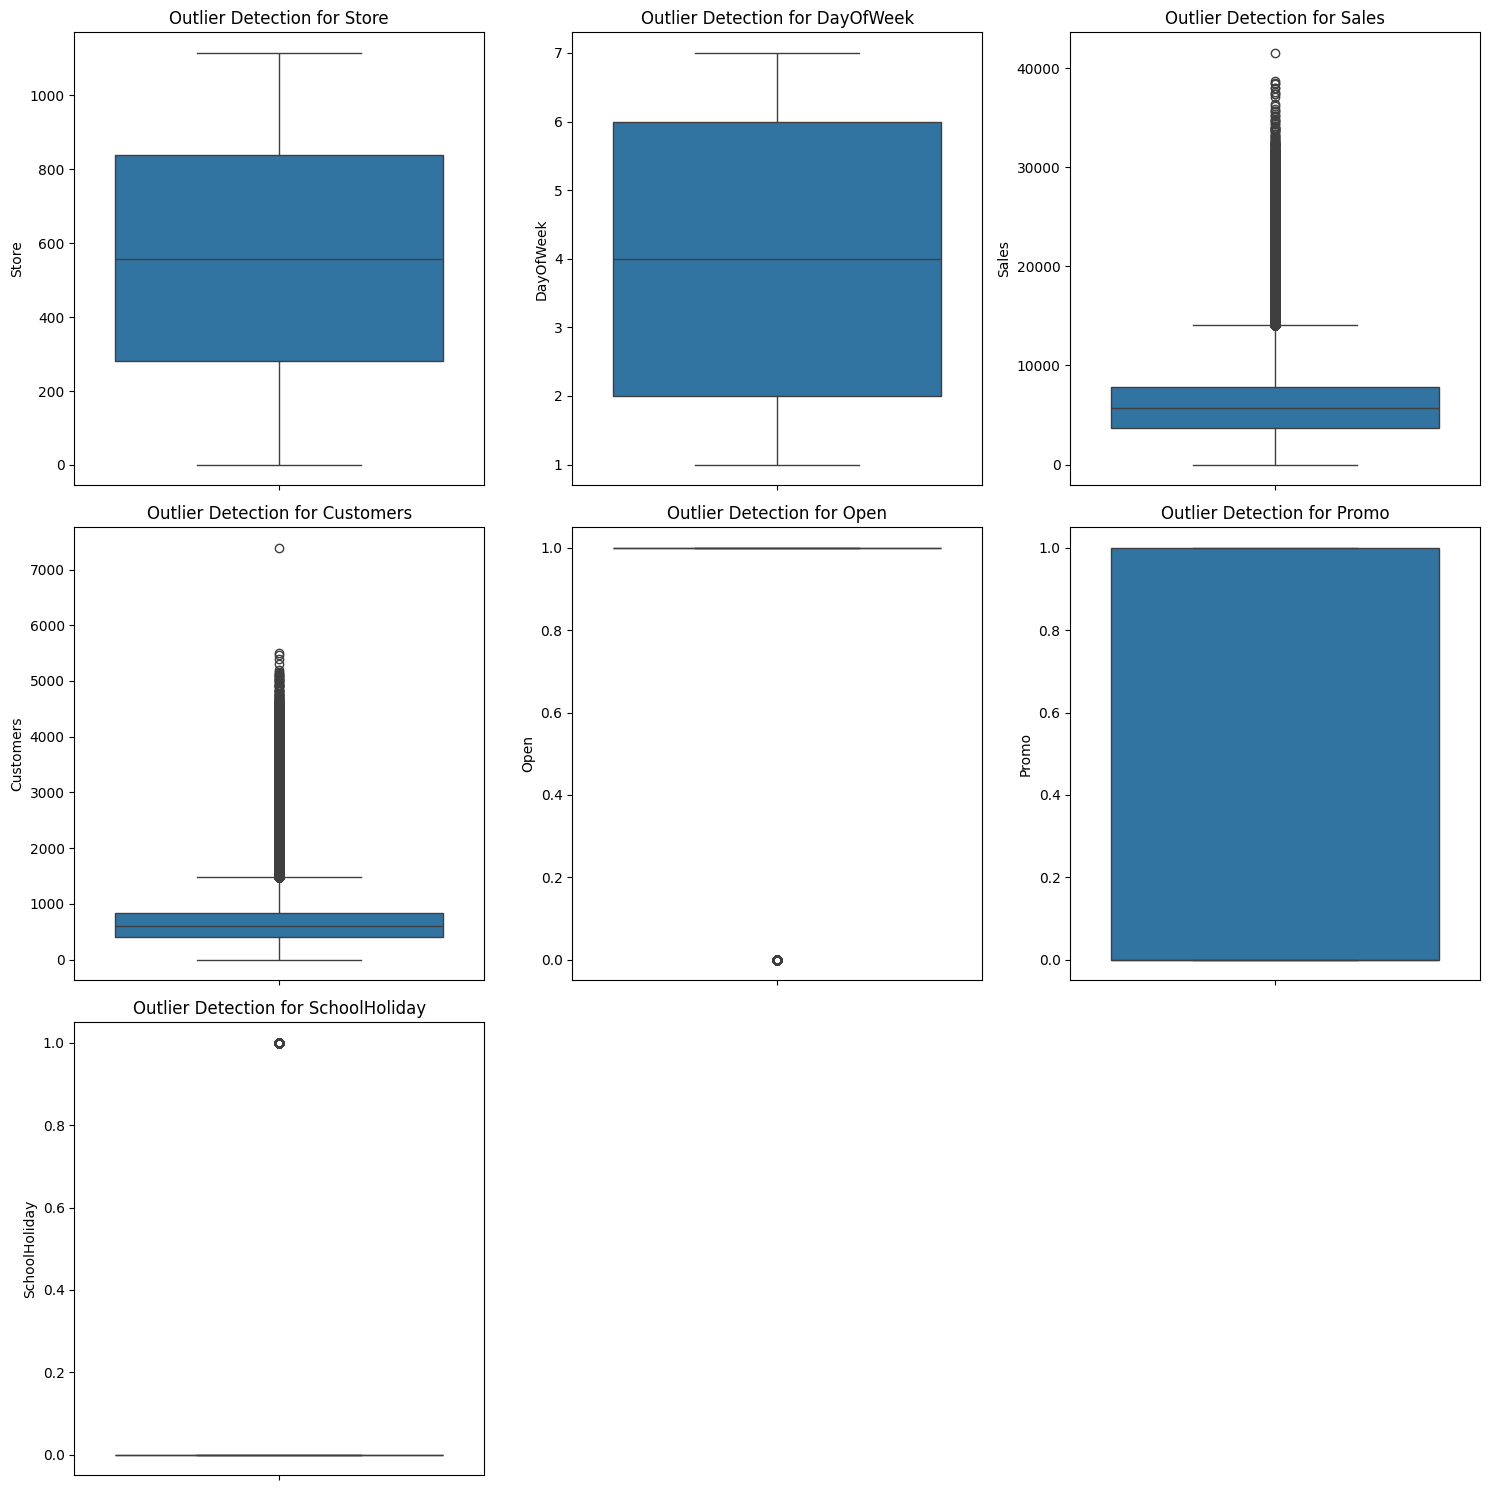

In [7]:
print("🕵️‍♀️ Missing Values:")
print(detect_missing_values(train))
# Detect Outliers
print("\n🕵️‍♂️ Outliers:")
print(detect_outliers(train))
outlier_detection(train)

🕵️‍♀️ Missing Values:
                           Missing Values  Percentage Missing
CompetitionDistance                     3            0.269058
CompetitionOpenSinceMonth             354           31.748879
CompetitionOpenSinceYear              354           31.748879
Promo2SinceWeek                       544           48.789238
Promo2SinceYear                       544           48.789238
PromoInterval                         544           48.789238

🕵️‍♂️ Outliers:
                           Total Outliers  Lower Bound  Upper Bound
Store                                   0       -556.0       1672.0
CompetitionDistance                   108      -8530.0      16130.0
CompetitionOpenSinceMonth               0         -5.0         19.0
CompetitionOpenSinceYear               11       1995.5       2023.5
Promo2                                  0         -1.5          2.5
Promo2SinceWeek                         0        -23.0         73.0
Promo2SinceYear                         0       200

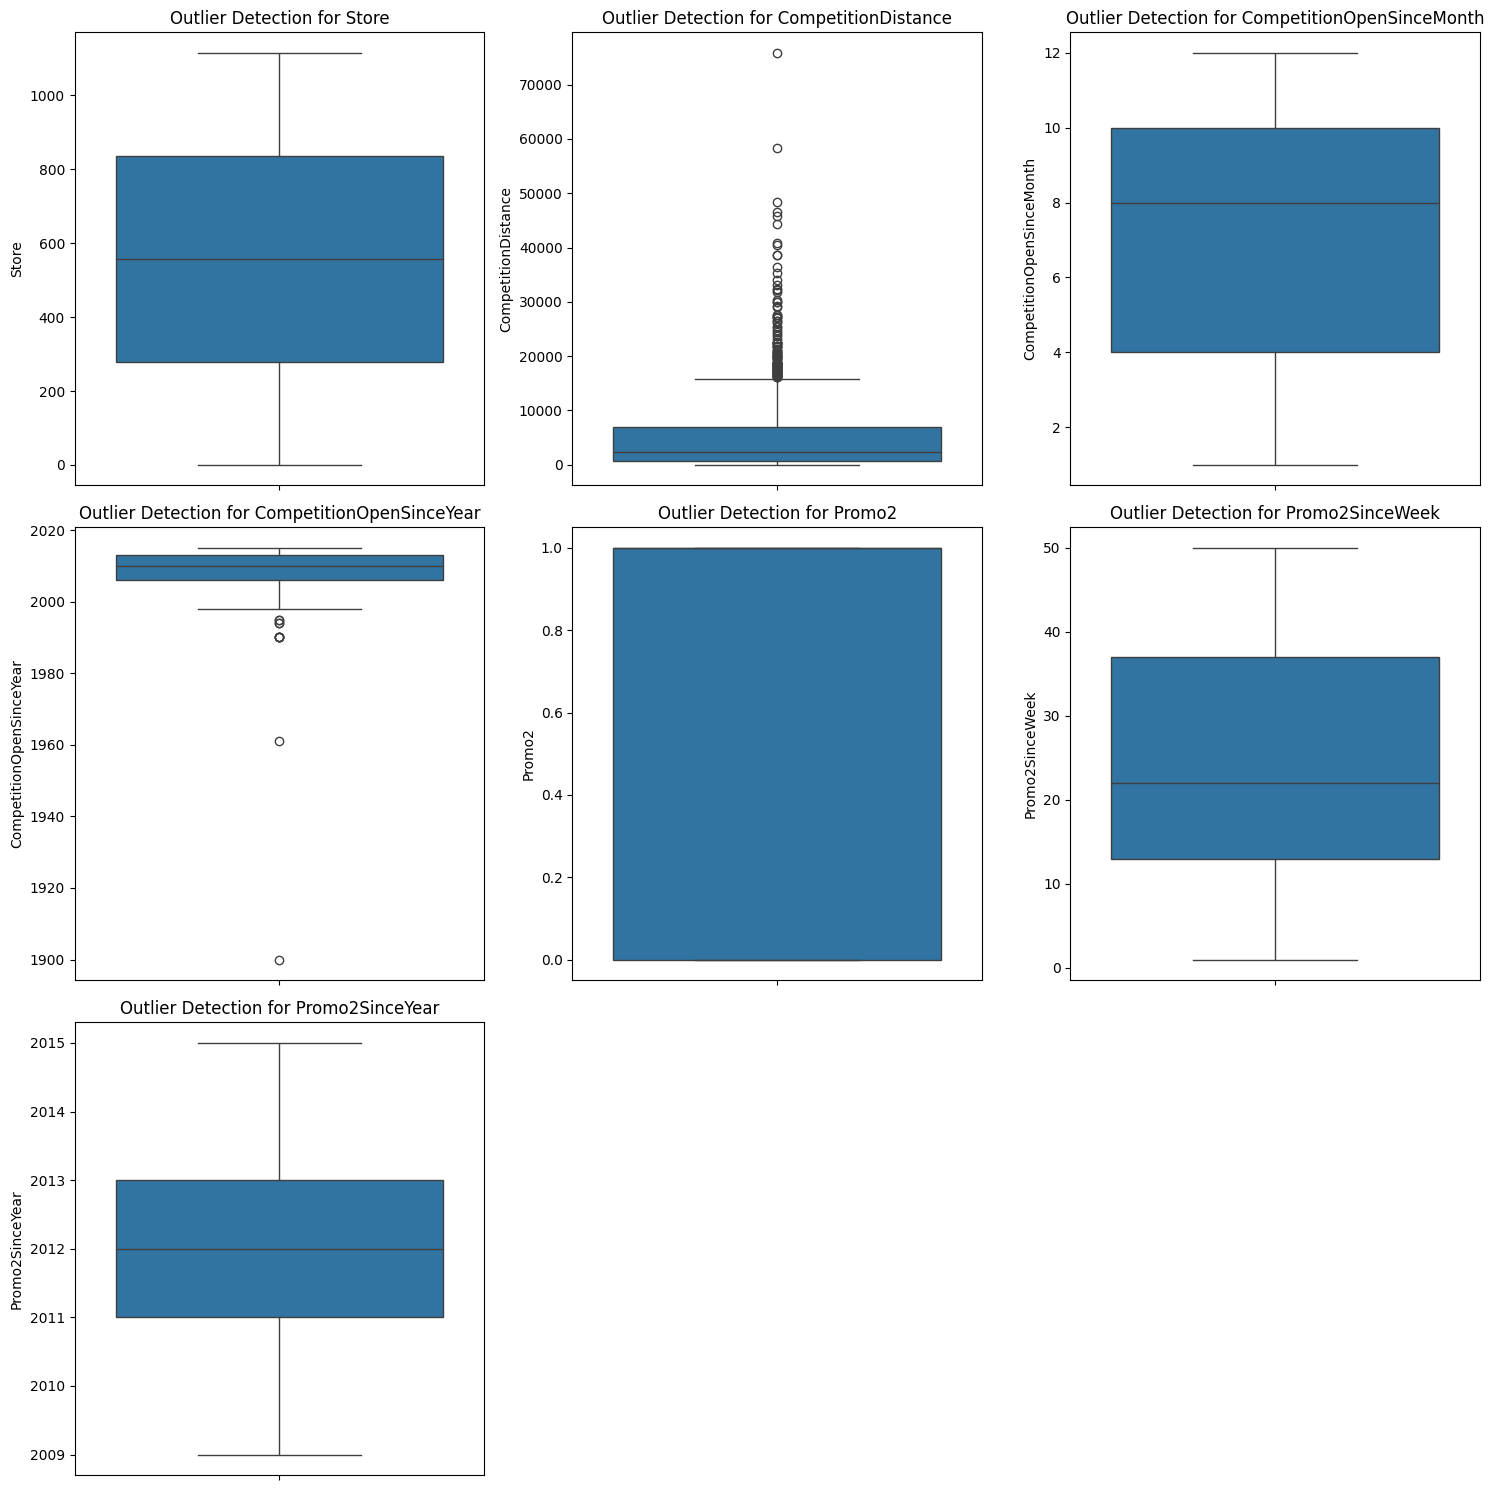

In [8]:
print("🕵️‍♀️ Missing Values:")
print(detect_missing_values(store))
# Detect Outliers
print("\n🕵️‍♂️ Outliers:")
print(detect_outliers(store))
outlier_detection(store)

In [12]:
train = preprocess_data(train)
    
print("\nAfter Preprocessing:")
print(train.head())
print(train.isnull().sum())


After Preprocessing:
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


In [13]:
store = preprocess_data(store)
    
print("\nAfter Preprocessing:")
print(store.head())
print(store.isnull().sum())


After Preprocessing:
   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              16107.5                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0             14.0           2011.0   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0             14.0           2011.0   
4                    2015.0       0             14.0           2011.0   

     PromoInterval  
0             None  
1  Jan,Apr

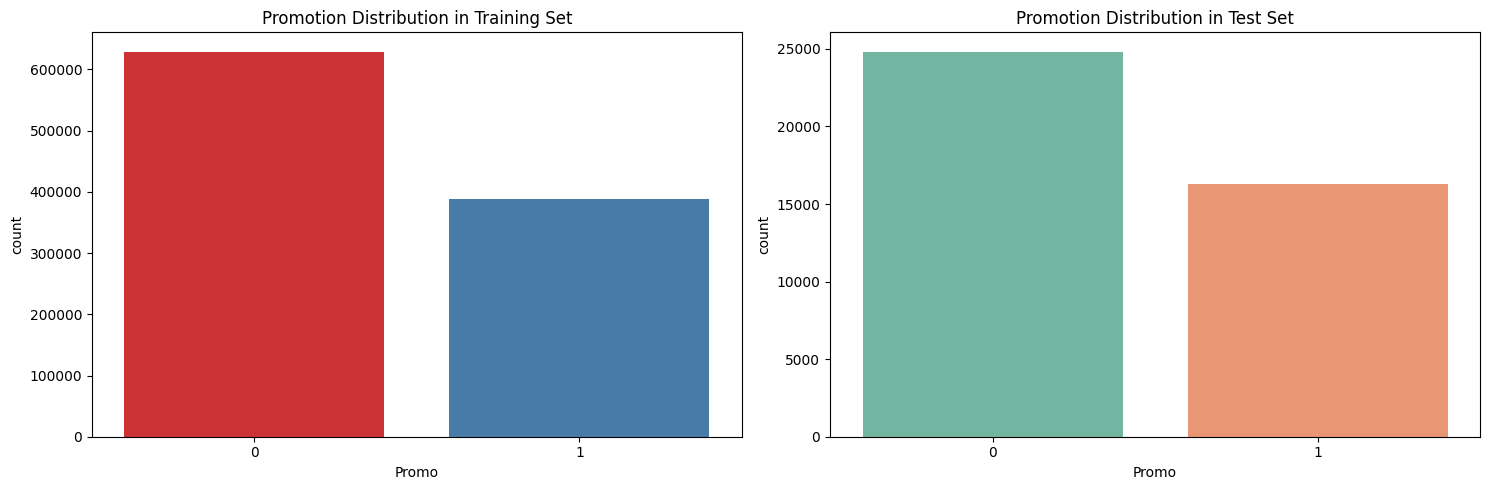

In [9]:
plot_promotion_distribution(train, test)

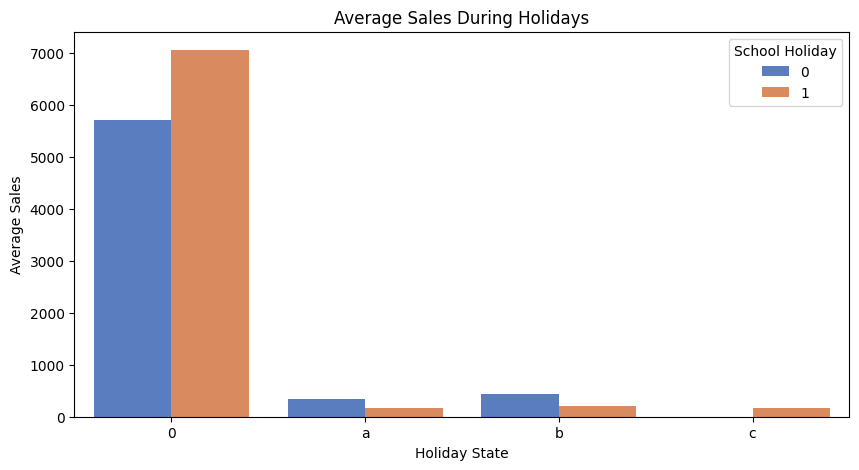

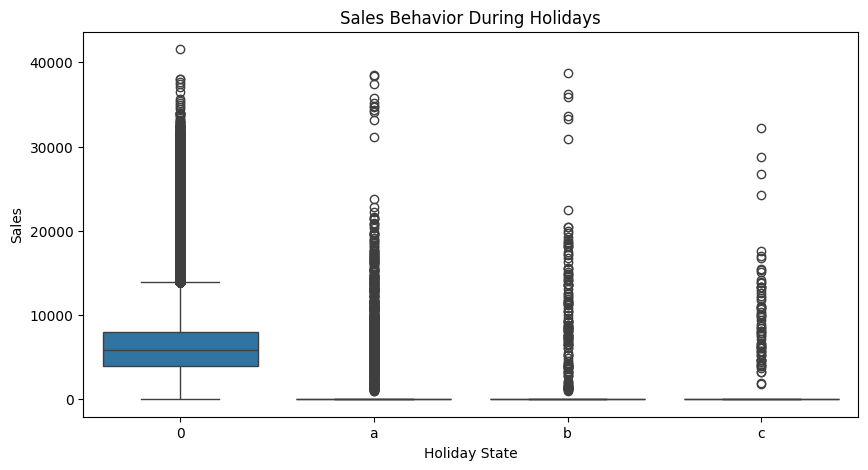

In [10]:
analyze_sales_holidays(train)

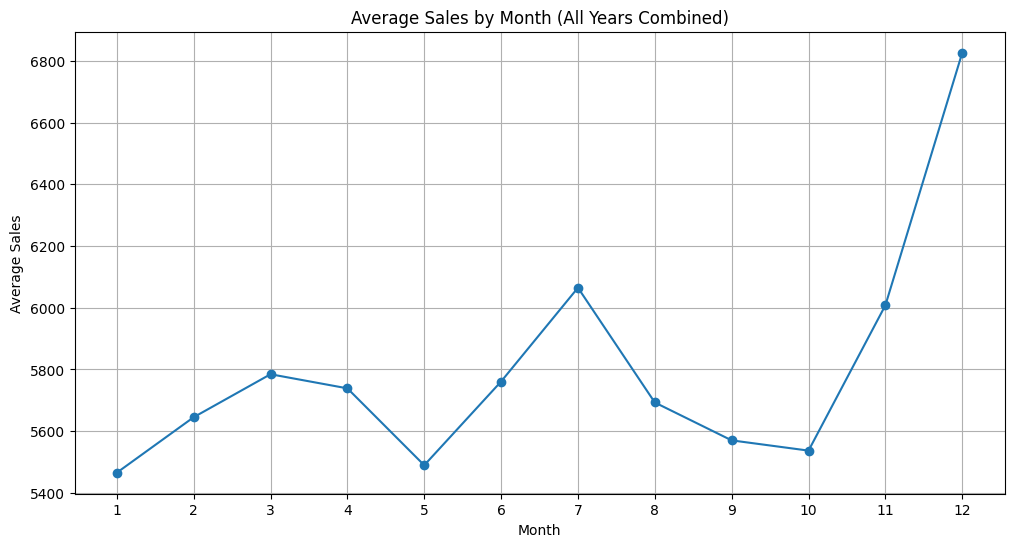

In [11]:
plot_monthly_sales_trend(train)

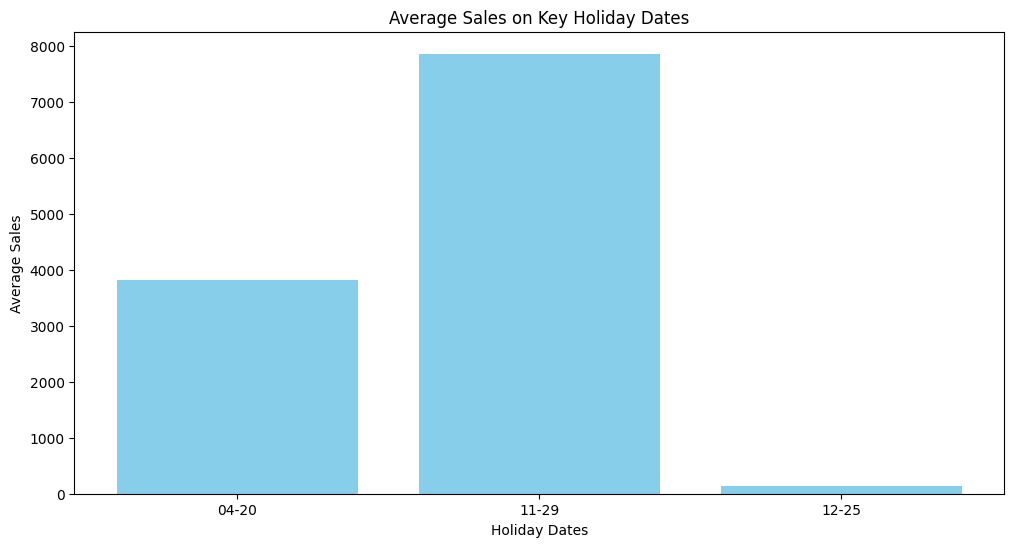

In [12]:
analyze_sales_on_key_dates(train)

Correlation between Sales and Customers: 0.8947107733016958


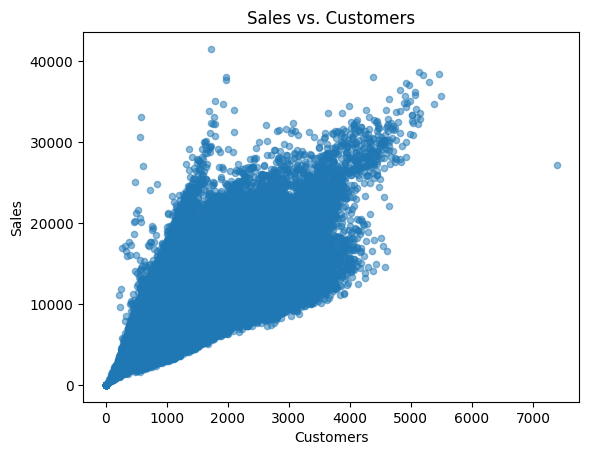

In [13]:
plot_sales_vs_customers(train)

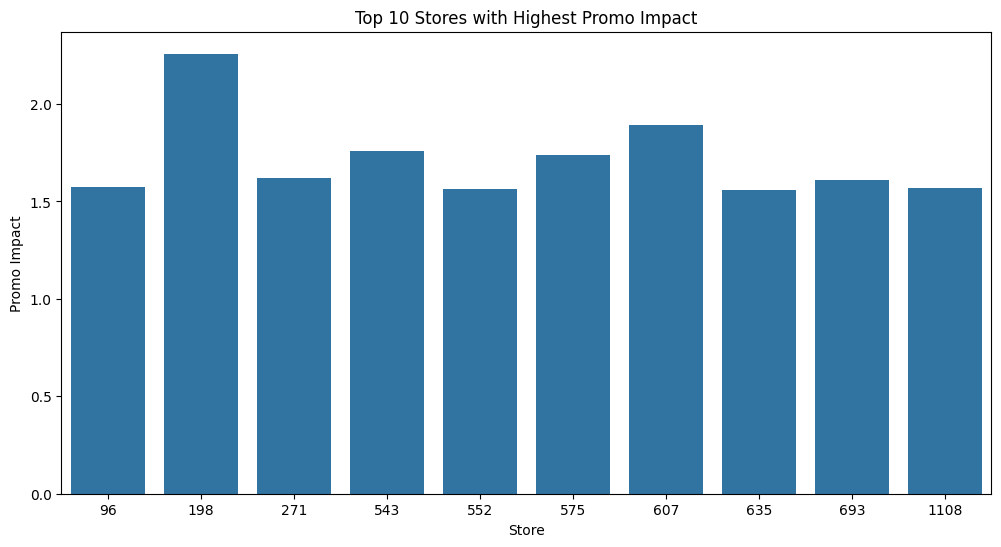

In [14]:
plot_promo_effectiveness(train)

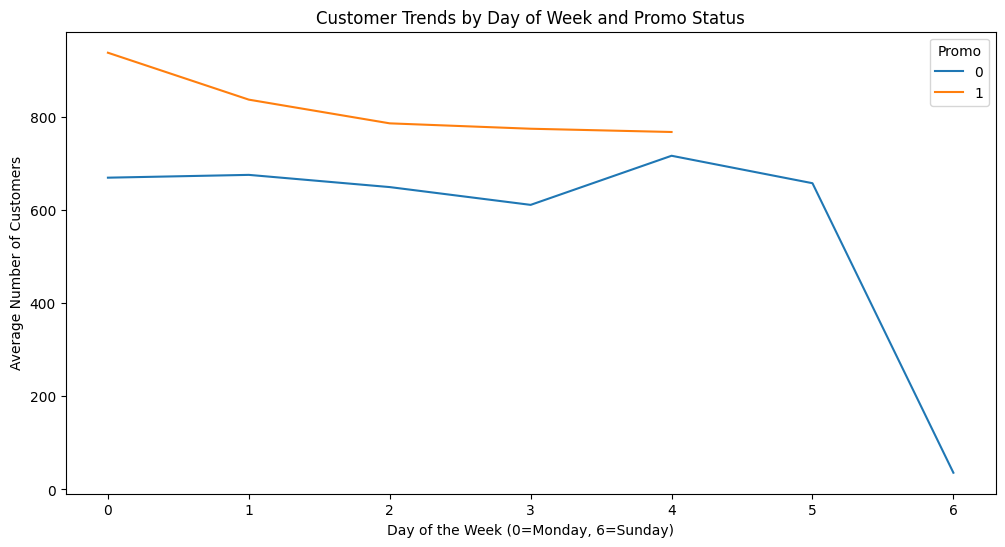

In [15]:
plot_customer_trends_by_day(train)

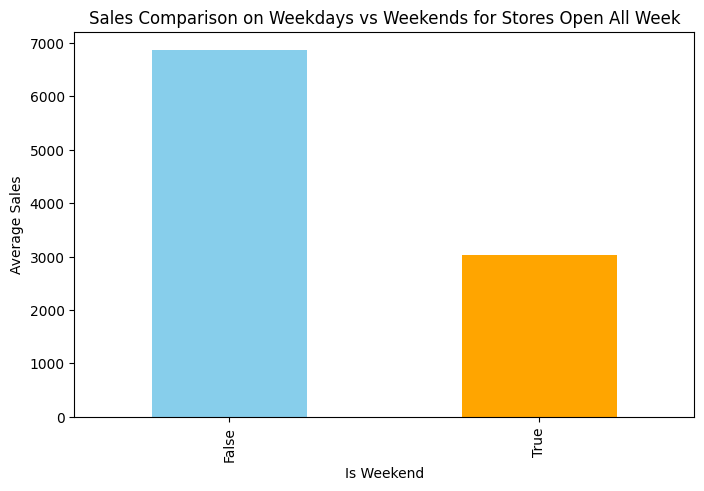

In [16]:
plot_weekend_vs_weekday_sales(train)

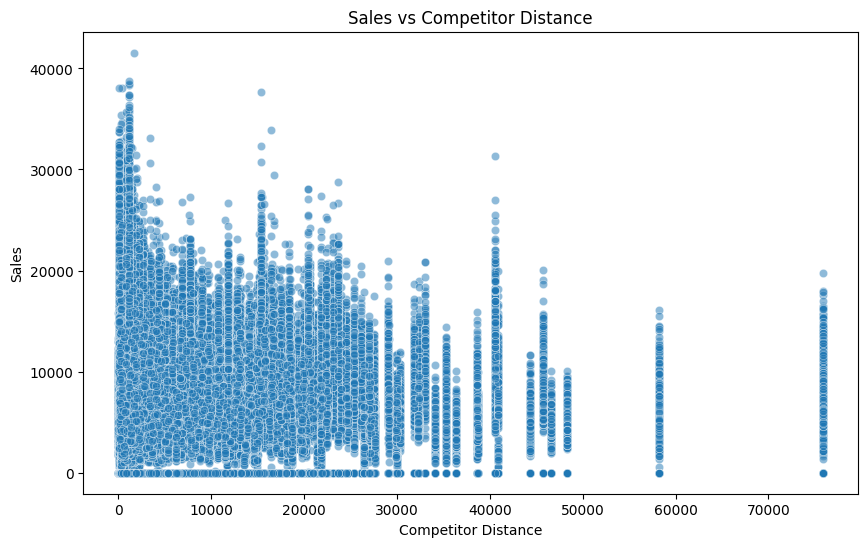

In [19]:
import pandas as pd 
train_store = pd.merge(train, store, on='Store')

plot_sales_vs_competitor_distance(train_store)

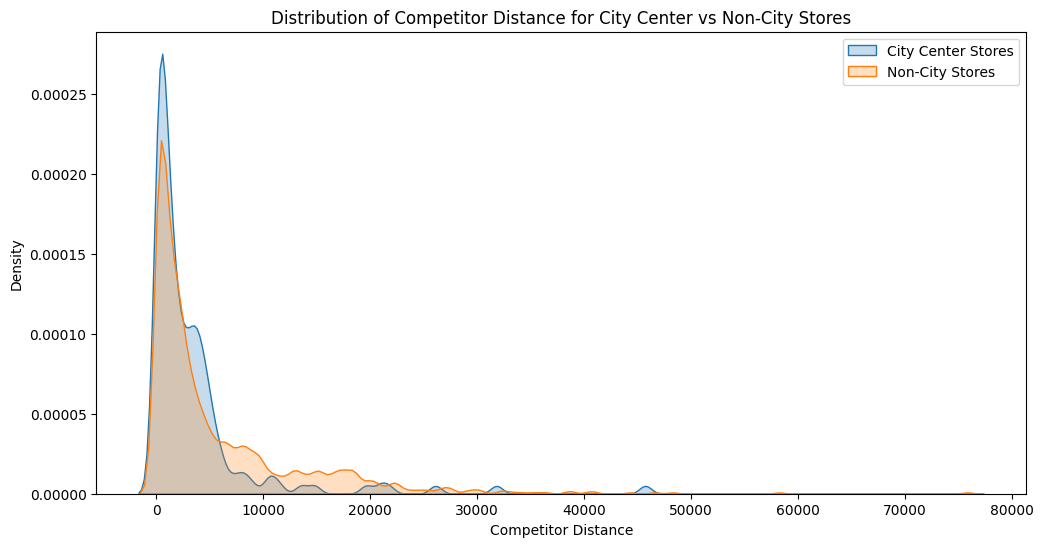

In [20]:
plot_city_center_sales(train_store)

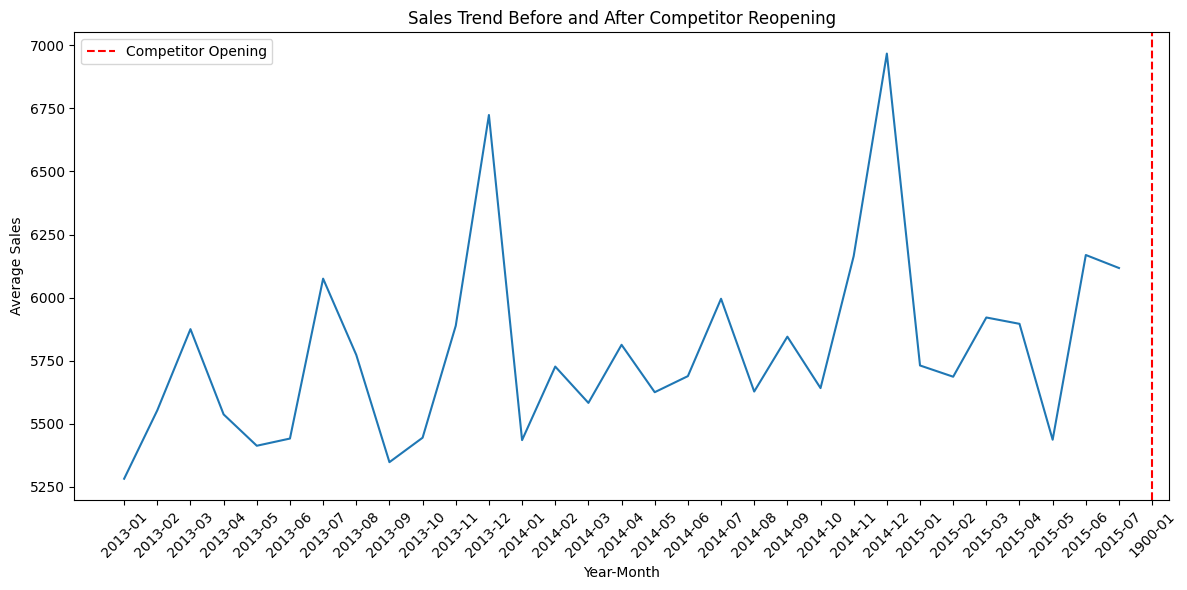

In [21]:
plot_sales_trend_before_after_competitor_opening(train_store)

             Sales   Customers
Promo                         
0      4406.050805  517.823542
1      7991.152046  820.098815


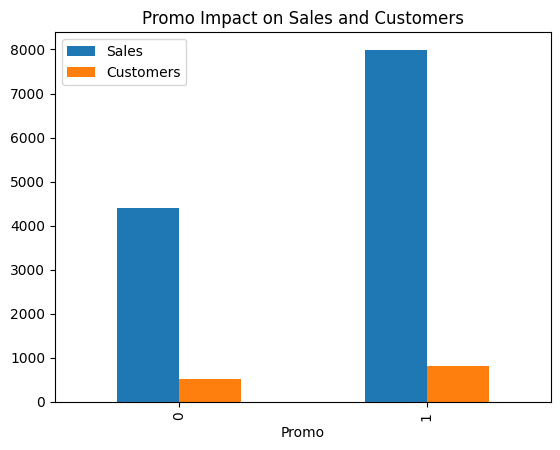

             Sales   Customers  SalesPerCustomer
Promo                                           
0      4406.050805  517.823542          8.508788
1      7991.152046  820.098815          9.744133


In [16]:
# Compare sales and customers during promotions vs non-promotions
promo_effect = train.groupby('Promo').agg({'Sales': 'mean', 'Customers': 'mean'})
print(promo_effect)

# Plot Promo Effect
promo_effect.plot(kind='bar', title='Promo Impact on Sales and Customers')
plt.show()
train['SalesPerCustomer'] = train['Sales'] / train['Customers']
promo_effect['SalesPerCustomer'] = promo_effect['Sales'] / promo_effect['Customers']
print(promo_effect)


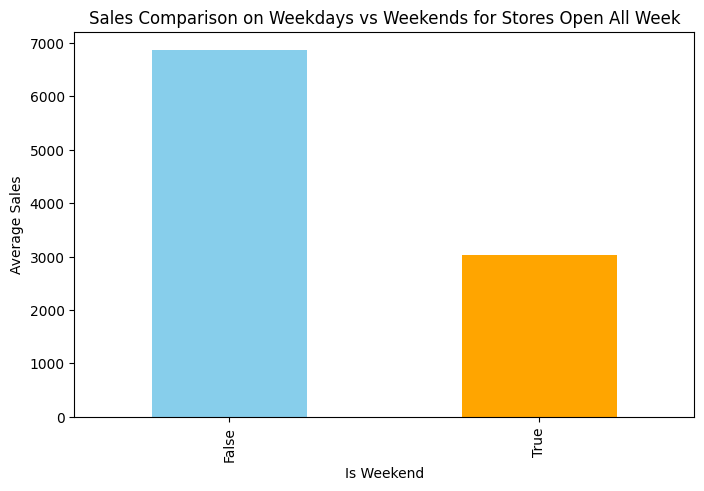

In [19]:
# Identify stores open all weekdays
weekday_open_stores = train.groupby('Store')['DayOfWeek'].nunique().reset_index()
weekday_open_stores = weekday_open_stores[weekday_open_stores['DayOfWeek'] == 7]

# Compare weekend sales
train['IsWeekend'] = train['DayOfWeek'].isin([5, 6])
sales_by_weekend = train[train['Store'].isin(weekday_open_stores['Store'])].groupby('IsWeekend')['Sales'].mean()

# Visualize weekend vs weekday sales
sales_by_weekend.plot(kind='bar', color=['skyblue', 'orange'], figsize=(8, 5))
plt.title('Sales Comparison on Weekdays vs Weekends for Stores Open All Week')
plt.xlabel('Is Weekend')
plt.ylabel('Average Sales')
plt.show()


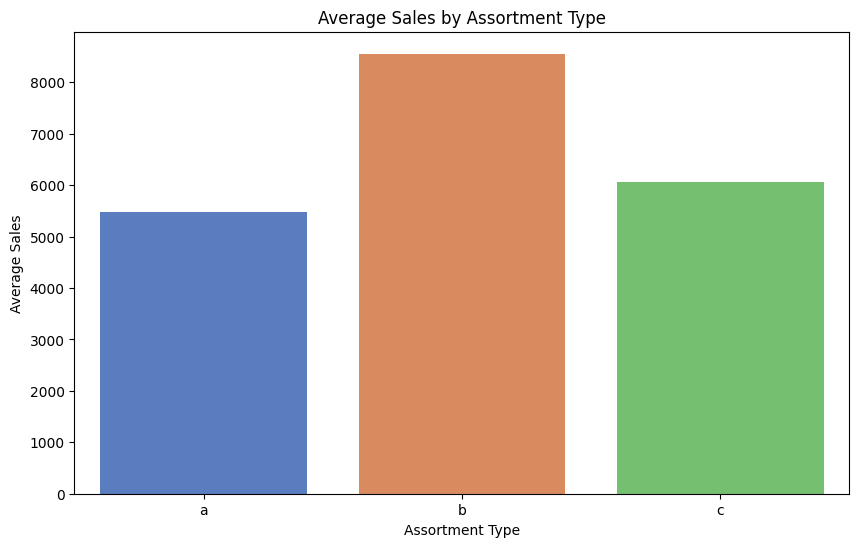

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Merge train data with store data to include assortment info
train_store = pd.merge(train, store, on='Store')

# Group by Assortment and calculate average sales
assortment_sales = train_store.groupby('Assortment')['Sales'].mean().reset_index()

# Visualize assortment type impact on sales
plt.figure(figsize=(10, 6))
sns.barplot(data=assortment_sales, x='Assortment', y='Sales', hue='Assortment', palette='muted', legend=False)
plt.title('Average Sales by Assortment Type')
plt.xlabel('Assortment Type')
plt.ylabel('Average Sales')
plt.show()
